In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [2]:
#Loading the file
data=pd.read_csv("Data.csv",encoding="ISO-8859-1")
#Displaying the dataset  
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


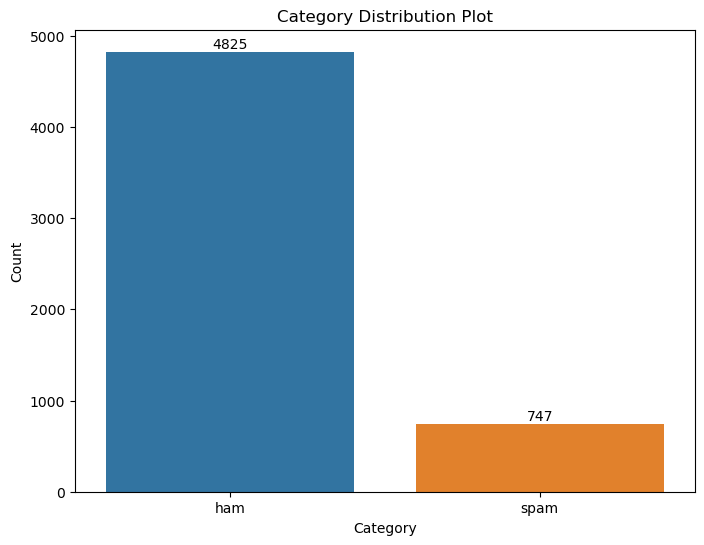

In [3]:
data.columns=["Category","Message"]
#Counting the occurrence of each category
category_count=data["Category"].value_counts().reset_index()
category_count.columns=["Category","Count"]
#Displaying the category distribution 
plt.figure(figsize=(8,6))
sns.barplot(x="Category",y="Count",data=category_count)
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Category Distribution Plot")
for i,count in enumerate(category_count["Count"]):
    plt.text(i,count,str(count),horizontalalignment="center",verticalalignment="bottom")
plt.show()

In [4]:
data["spam"]=data["Category"].apply(lambda x:1 if x=="spam" else 0)

In [5]:
#Splitting the dataset
train,test=train_test_split(data,test_size=0.2)

In [6]:
#Extracting the feature and target variable for the training dataset
train_x=train[["Message","spam"]] 
train_y=train.Category
#Extracting the feature and target variable for the testing dataset 
test_x=test[["Message","spam"]] 
test_y=test.Category

In [7]:
#Initializing the vectorizer
featurer=CountVectorizer()
x_train_count=featurer.fit_transform(train_x["Message"].values)

In [8]:
#Building the multinomial naive bayes classifier model
model=MultinomialNB()
model.fit(x_train_count,train_y);

In [9]:
x_test_count=featurer.transform(test_x["Message"].values)
test_accuracy=(100*model.score(x_test_count,test_y))
#Displaying the testing accuracy
print(f"Testing Accuracy:{test_accuracy:6.2f}%")

Testing Accuracy: 98.48%


In [10]:
#First sample message
message_1=["Congratulations!!You have won $1000 in this week's lottery.Click the link and fill in with your details to avail the cash prize"]
message_1_count=featurer.transform(message_1)
#Predicting the probability of each class
probabilities=model.predict_proba(message_1_count)
probability=probabilities[0][1] 
#Setting threshold value
threshold=0.5 
if probability>=threshold:
    print("It is a spam message.")
else:
    print("It is not a spam message.")

It is a spam message.


In [11]:
#Second sample message
message_2=["Thank you for your inquiry.We have received your message and will get back to you as soon as possible."]
message_2_count=featurer.transform(message_2)
#Predicting the probability of each class
probabilities=model.predict_proba(message_2_count)
probability=probabilities[0][1] 
#Setting threshold value
threshold=0.5 
if probability>=threshold:
    print("It is a spam message.")
else:
    print("It is not a spam message.")

It is not a spam message.
